<a href="https://colab.research.google.com/github/youngsunjang/ClassTransformer/blob/main/Vivo_Vitro_Others.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613

Transformer from scratch: https://www.youtube.com/watch?v=U0s0f995w14&t=1593s

In [ ]:
# Developed and managed by Hugging Face
# Hugging Face: A company that develops tools for building applications using machine learning (In particular, NLP)
!pip install transformers

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset
from tqdm.notebook import tqdm

In [ ]:
# Tokenizer for tokenization (subword-based tokenization)
# Splits unknown words into smaller words or characters such that the model can derive some meaning from the tokens
from transformers import BertTokenizer
# Model for sentence/document classification among many models (https://huggingface.co/transformers/v3.0.2/model_doc/bert.html#bertmodel)
from transformers import BertForSequenceClassification

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")
model

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

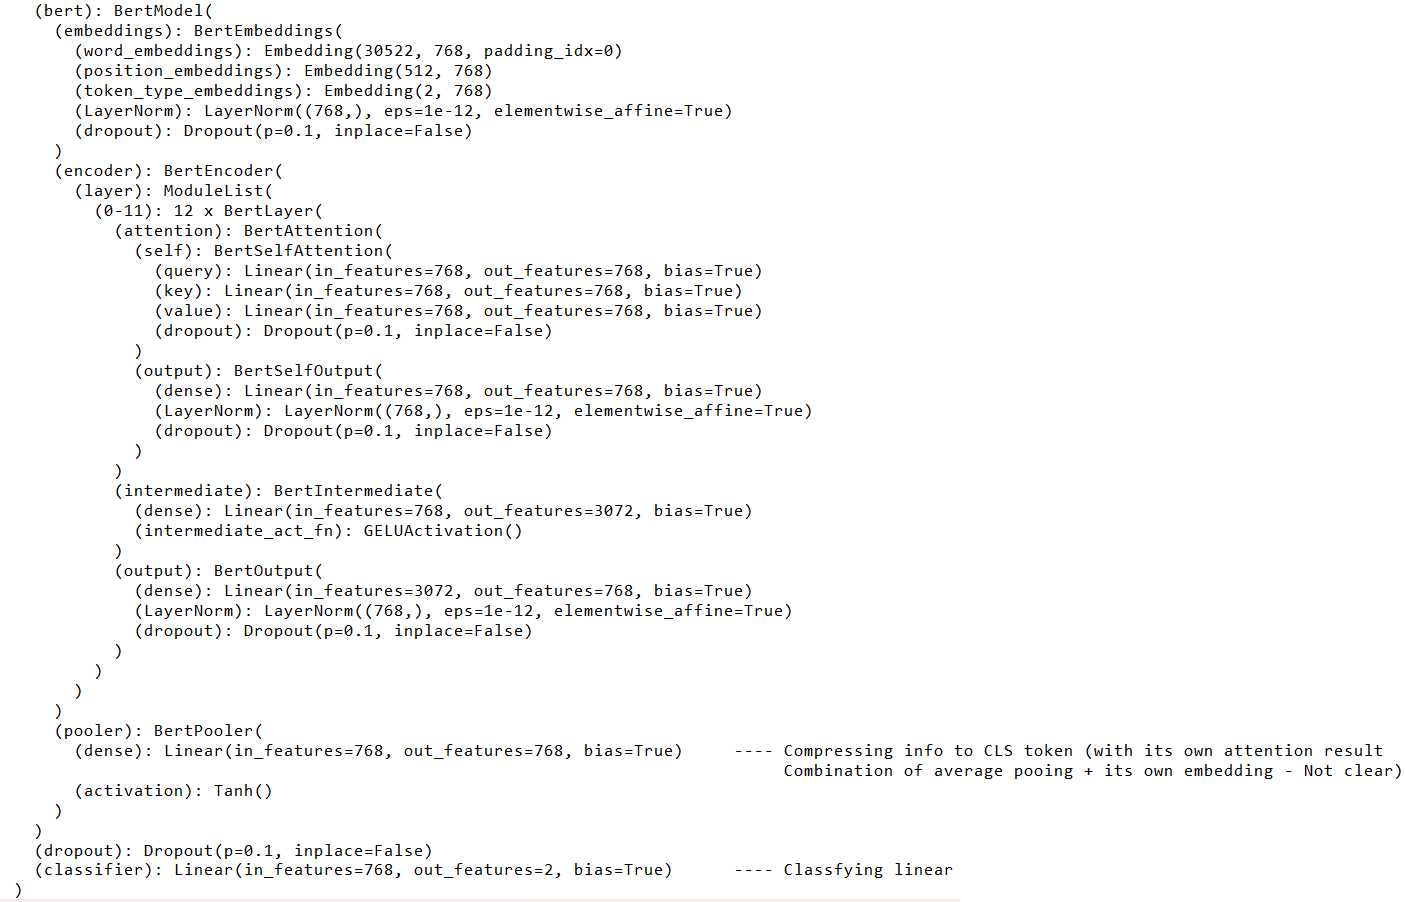

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/Classification/Multiclassification/Method/Train_dataset_label.xlsx')
df_valid = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/Classification/Multiclassification/Method/Test_dataset_label.xlsx')

In [ ]:
print(df.head())
print(df_valid.head())

                                              Paper   \
0  Experimental Studies of Brain Tumor Developmen...   
1  Radiofrequency Electromagnetic Field Have No E...   
2  Chronic Exposure of Cancer-Prone Mice to Low-L...   
3  Long Term Low Level Exposure of Mice Prone to ...   
4  Long Term Low Level Microwave Irradiation of Rats   

                                            Abstract  Target           Class  \
0  It has been suggested that electromagnetic fie...       1  Method In-Vivo   
1  The intracranial 9L tumor model was used to de...       1  Method In-Vivo   
2  The purpose of this study was to determine whe...       1  Method In-Vivo   
3  The purpose of this study was to determine if ...       1  Method In-Vivo   
4  Our goal was to investigate effects of long-te...       1  Method In-Vivo   

   Label  
0      0  
1      0  
2      0  
3      0  
4      0  
                                              Paper   \
0  900-MHz microwave radiation promotes oxidation...   
1  G

In [ ]:
print(df['Class'].value_counts())
print(df_valid['Class'].value_counts())

Method In-Vivo     233
Method In-Vitro     94
Method Others       16
Name: Class, dtype: int64
Method In-Vivo     60
Method In-Vitro    48
Method Others       6
Name: Class, dtype: int64


In [ ]:
label_dict = {'Method In-Vivo': 0, 'Method In-Vitro': 1, 'Method Others': 2}
print(label_dict)

{'Method In-Vivo': 0, 'Method In-Vitro': 1, 'Method Others': 2}


In [ ]:
df.groupby(['Class', 'Label']).count()

,,Paper,Abstract,Target
Class,Label,,,
Method In-Vitro,1,94,94,94
Method In-Vivo,0,233,233,233
Method Others,2,16,16,16


In [ ]:
df_valid.groupby(['Class', 'Label']).count()

,,Paper,Abstract,Target
Class,Label,,,
Method In-Vitro,1,48,48,48
Method In-Vivo,0,60,60,60
Method Others,2,6,6,6


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# batch_encode_plus: tokenizes a batch of (pairs of) sequences
# vs encode_plus: tokenizes just a single sequence.
encoded_data_train = tokenizer.batch_encode_plus(
    df.Abstract.values,
    add_special_tokens=True,
    # return_attention_mask=True,
    pad_to_max_length=True,
    padding='max_length',
    max_length=256,
    truncation=True,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df_valid.Abstract.values,
    add_special_tokens=True,
    # return_attention_mask=True,
    pad_to_max_length=True,
    padding='max_length',
    max_length=256,
    truncation=True,
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df.Label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df_valid.Label.values)

In [ ]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
len(dataset_train), len(dataset_val)


(343, 114)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 1

dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val,
                                   sampler=SequentialSampler(dataset_val),
                                   batch_size=batch_size)

In [ ]:
from transformers import get_linear_schedule_with_warmup
from torch.optim import AdamW

optimizer = AdamW(model.parameters(),
                  lr=1e-5,
                  eps=1e-8)

In [ ]:
epochs = 20

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)} '
         f'({len(y_preds[y_preds==label])/len(y_true)*100:.2f}%)\n')

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [ ]:
def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [ ]:
for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    torch.save(model.state_dict(), f'/content/finetuned_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/343 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.02892464984905989
Validation loss: 0.6281111925931518
F1 Score (Weighted): 0.9031150808297039


Epoch 2:   0%|          | 0/343 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.022840843228672483
Validation loss: 0.6976880631739557
F1 Score (Weighted): 0.9044533772762076


Epoch 3:   0%|          | 0/343 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.009909195825563636
Validation loss: 0.6027655535271742
F1 Score (Weighted): 0.9298245614035088


Epoch 4:   0%|          | 0/343 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.00012907054887769905
Validation loss: 0.6519811809566978
F1 Score (Weighted): 0.9184876436639867


Epoch 5:   0%|          | 0/343 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
model.load_state_dict(torch.load('/content/finetuned_BERT_epoch_10.model', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
_, predictions, true_vals = evaluate(dataloader_validation)

In [ ]:
accuracy_per_class(predictions, true_vals)

Class: Method In-Vivo
Accuracy: 57/60 (95.00%)

Class: Method In-Vitro
Accuracy: 46/48 (95.83%)

Class: Method Others
Accuracy: 2/6 (33.33%)



Transformer from scratch: https://www.youtube.com/watch?v=U0s0f995w14&t=1593s